<a href="https://colab.research.google.com/github/EDSONRRs/DIPLOMADO/blob/main/PROYCTO_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
d = pd.read_csv('/content/titles.csv')
df=pd.DataFrame(d)
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3294.000000,3294.000000,756.000000,2922.000000,2.911000e+03,3261.000000,3026.000000
mean,2001.194293,80.914997,2.998677,6.883949,6.461835e+04,21.105891,6.850099
std,23.542337,38.475347,3.651181,1.059668,1.754617e+05,89.137800,1.081377
min,1901.000000,1.000000,1.000000,1.500000,5.000000e+00,0.050393,1.000000
25%,1995.000000,51.250000,1.000000,6.300000,9.245000e+02,3.450000,6.200000
50%,2010.000000,89.000000,2.000000,7.000000,8.071000e+03,8.561000,6.900000
75%,2018.000000,106.000000,4.000000,7.600000,4.764500e+04,17.711000,7.500000
max,2022.000000,255.000000,52.000000,9.400000,2.555504e+06,4447.894000,10.000000


In [ ]:
df.shape

(3294, 15)

In [ ]:
df.head()

In [ ]:
#df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)#debe rellenar los valores nullos no usar

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

(3294, 15)

In [ ]:
df.isnull().sum()

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [ ]:
df['production_countries']=df['production_countries'].str.strip('[]')#quitar corchetes de ciudad de produccion
df['genres']=df['genres'].str.strip('[]')#quitar corchetes de genero #paso 1

In [ ]:
df['production_countries']=df['production_countries'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['production_countries'],inplace=True)#remplazar los valores nullos de ciudad de produccion paso 2

In [ ]:
df['imdb_score'].fillna(df['tmdb_score'], inplace=True)#falta si PASO 3

In [ ]:
df['imdb_id']=df['imdb_id'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['imdb_id'],inplace=True)#elimina las nullas PASO 4

In [ ]:
df['age_certification']=df['age_certification'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['age_certification'],inplace=True)#PAso 5

In [ ]:
df['seasons'].fillna(0, inplace=True) #Rellenar con 0 Paso 6

In [ ]:
df['imdbvotes']=df['imdb_votes'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['imdb_votes'],inplace=True)#elimina las nullas PASO 7

In [ ]:
df['tmdb_popularity']=df['tmdb_popularity'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['tmdb_popularity'],inplace=True)#Paso 8

In [ ]:
df['tmdb_score']=df['tmdb_score'].replace(r'^s*$', float('NaN'), regex = True)
df.dropna(subset=['tmdb_score'],inplace=True)#Paso 9

In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdbvotes'],
      dtype='object')

In [ ]:
#borrar columnas
df_2=df.drop(['imdb_id','title','type','description','release_year','age_certification','genres','production_countries','seasons'],axis=1)

In [ ]:
df_2.columns

Index(['id', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdbvotes'],
      dtype='object')

In [ ]:
df_2.shape

(1877, 7)

In [ ]:
df_2.isnull().sum()

id                 0
runtime            0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
imdbvotes          0
dtype: int64

In [ ]:
df_2.columns

Index(['id', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdbvotes'],
      dtype='object')

In [ ]:
index_votes = df_2.columns.get_loc('imdbvotes')
df_2.insert(index_votes + 1, 'tmdb_scores', df_2['tmdb_score'])
df_2.drop('tmdb_score', axis=1, inplace=True)

In [ ]:
df_2=df_2.set_index(['id'])

In [ ]:
df_2.head()

,runtime,imdb_score,imdb_votes,tmdb_popularity,imdbvotes,tmdb_scores
id,,,,,,
tm155702,102,8.100,389774.000,41.442,389774.000,7.600
tm83648,119,8.300,433804.000,14.383,433804.000,8.000
tm77588,102,8.500,558849.000,20.087,558849.000,8.200
tm156463,233,8.200,309856.000,24.092,309856.000,8.000
tm47834,117,8.300,155068.000,9.165,155068.000,8.100


In [ ]:
df_2.runtime['ts314732']

id
tm155702    102
tm83648     119
tm77588     102
Name: runtime, dtype: int64

In [ ]:
df_2.dtypes

runtime              int64
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
imdbvotes          float64
tmdb_scores        float64
dtype: object

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)#quitar los numers en forma cientifica

In [ ]:
df_2.describe()

,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,imdbvotes
count,1877.000,1877.000,1877.000,1877.000,1877.000,1877.000
mean,86.388,6.806,95472.836,31.619,6.841,95472.836
std,38.627,1.119,211193.139,114.732,1.017,211193.139
min,4.000,1.500,5.000,0.050,1.000,5.000
25%,57.000,6.100,5237.000,7.881,6.200,5237.000
50%,96.000,6.900,22647.000,13.584,6.900,22647.000
75%,112.000,7.600,87665.000,27.354,7.600,87665.000
max,242.000,9.400,2555504.000,4447.894,10.000,2555504.000


Text(0.5, 1.0, 'Gráfico de Dispersión')

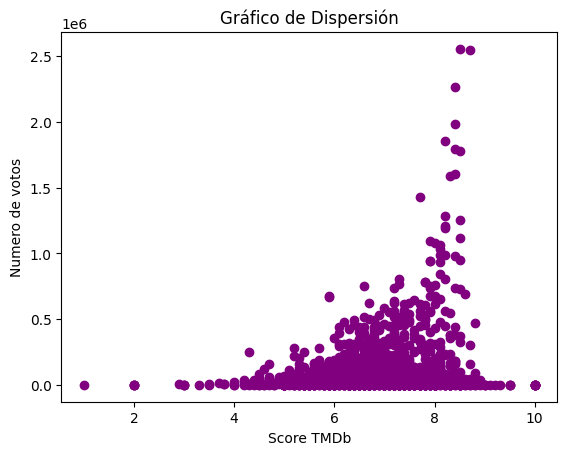

In [ ]:
valores_x = df_2['tmdb_scores']
valores_y = df_2['imdb_votes']
plt.scatter(valores_x, valores_y,color='purple')
plt.xlabel('Score TMDb')
plt.ylabel('Numero de votos')
plt.title('Gráfico de Dispersión')

Text(0.5, 1.0, 'Gráfico de Dispersión')

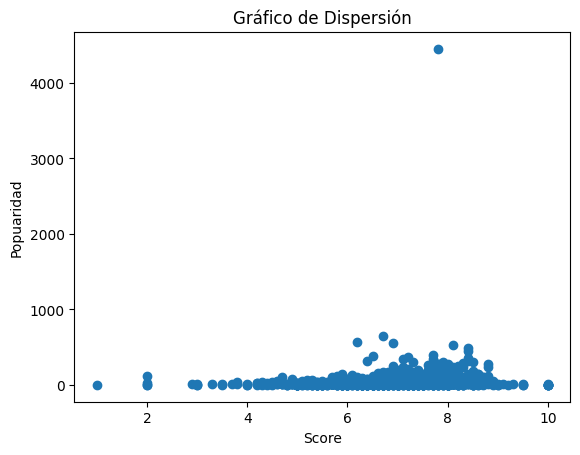

In [ ]:
valores_x = df_2['tmdb_scores']
valores_y = df_2['tmdb_popularity']
plt.scatter(valores_x, valores_y)
plt.xlabel('Score')
plt.ylabel('Popuaridad')
plt.title('Gráfico de Dispersión')

Text(0.5, 1.0, 'Score por tipo de edad')

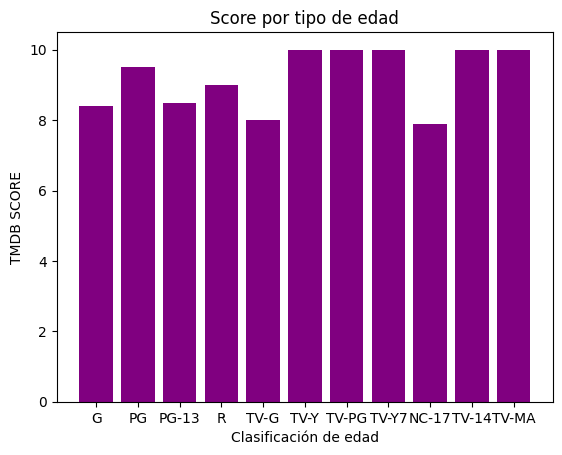

In [ ]:
plt.bar(df['age_certification'], df['tmdb_score'],color='purple')
plt.xlabel('Clasificación de edad')
plt.ylabel('TMDB SCORE')
plt.title('Score por tipo de edad')

In [ ]:
df_3=df.copy()

In [ ]:
df_3[:1]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,imdbvotes
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"'fantasy', 'family'",'US',0.000,tt0032138,8.100,389774.000,41.442,7.600,389774.000


In [ ]:
df_3['genres'] = df_3['genres'].str.split(',')
df_3 = df_3.explode('genres')

Text(0.5, 1.0, 'Score por tipo de genero')

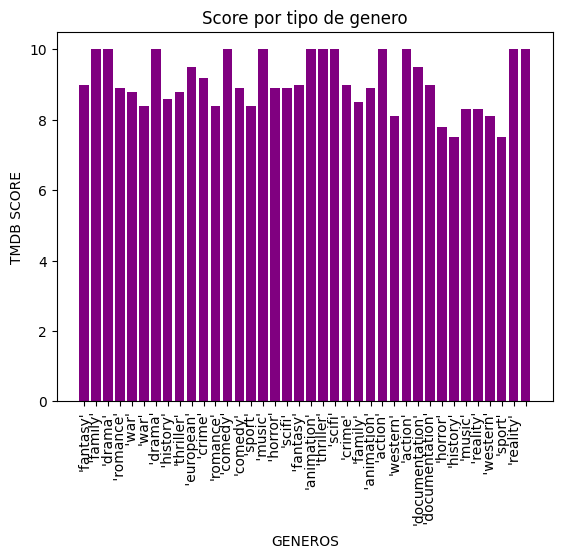

In [ ]:
plt.bar(df_3['genres'], df_3['tmdb_score'],color='purple')
plt.xlabel('GENEROS')
plt.ylabel('TMDB SCORE')
plt.xticks(rotation=90 )
plt.title('Score por tipo de genero')

In [ ]:
df_2['tmdb_scores'].min()

1.0

codificar columnas de tipo objeto

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_1=df.copy()#Hacer una copia para no trabajar con el original

In [ ]:
df_1.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdbvotes'],
      dtype='object')

In [ ]:
#cambiar a numerica la columna title
le = LabelEncoder()
df_1['title number'] = le.fit_transform(df_1['title'])
index_movie_name = df_1.columns.get_loc('title')
df_1.insert(index_movie_name + 1, 'title numbe', df_1['title number'])
df_1.drop('title', axis=1, inplace=True)#para borrar una columna

In [ ]:
#cambiar la de id
le = LabelEncoder()
df_1['id_num'] = le.fit_transform(df_1['id'])
index_id_n = df_1.columns.get_loc('id')
df_1.insert(index_id_n + 1, 'id_n', df_1['id_num'])
df_1.drop('id', axis=1, inplace=True)#para borrar una columna

In [ ]:
#cambiar la de imdb_id
le = LabelEncoder()
df_1['imdb_id'] = le.fit_transform(df_1['imdb_id'])
index_imdbid_n = df_1.columns.get_loc('imdb_id')
df_1.insert(index_imdbid_n + 1, 'imdb_id_n', df_1['imdb_id'])
df_1.drop('imdb_id', axis=1, inplace=True)#para borrar una columna

In [ ]:
#df.drop('Certi_n', axis=1, inplace=True)#para borrar una columna NO USAR

In [ ]:
#descripcion
le = LabelEncoder()
df_1['description_n'] = le.fit_transform(df_1['description'])
index_descrip = df_1.columns.get_loc('description')
df_1.insert(index_descrip+ 1, 'descrip_n', df_1['description_n'])
df_1.drop('description', axis=1, inplace=True)#para borrar una columna

In [ ]:
#tipo
mapping = {'MOVIE': 1, 'SHOW': 0}
df_1['type_n'] = df_1['type'].map(mapping)
df_1.drop('type', axis=1, inplace=True)#para borrar una columna

In [ ]:
#df_1.drop('Certi_n', axis=1, inplace=True)#no usar, borre una columan

In [ ]:
#clasificacion edad
le = LabelEncoder()
df_1['certifi_n'] = le.fit_transform(df_1['age_certification'])
index_age_cer = df_1.columns.get_loc('age_certification')
df_1.insert(index_age_cer+ 1, 'Certi_n', df_1['certifi_n'])
df_1.drop('age_certification', axis=1, inplace=True)#para borrar una columna

In [ ]:
#genero
le = LabelEncoder()
df_1['genero_n'] = le.fit_transform(df_1['genres'])
index_genres = df_1.columns.get_loc('genres')
df_1.insert(index_genres+ 1, 'gener_n', df_1['genero_n'])
df_1.drop('genres', axis=1, inplace=True)#para borrar una columna

In [ ]:
#df_1.drop('production_n', axis=1, inplace=True)#para borrar una columna

In [ ]:
#ciudad de produccion
le = LabelEncoder()
df_1['productio_n'] = le.fit_transform(df_1['production_countries'])
index_produ = df_1.columns.get_loc('production_countries')
df_1.insert(index_produ+ 1, 'production_n', df_1['productio_n'])
df_1.drop('production_countries', axis=1, inplace=True)#para borrar una columna

In [ ]:
index_produ_n = df_1.columns.get_loc('productio_n')
df_1.insert(index_produ_n + 1, 'tmdb_scores', df_1['tmdb_score'])
df_1.drop('tmdb_score', axis=1, inplace=True)

fin de la codificacion, no necesaria

In [ ]:
df_1.head()

,id_n,title numbe,descrip_n,release_year,Certi_n,runtime,gener_n,production_n,seasons,imdb_id_n,...,tmdb_popularity,imdbvotes,title number,id_num,description_n,type_n,certifi_n,genero_n,productio_n,tmdb_scores
0,400,1646,1861,1939,0,102,528,155,0.0,9,...,41.442,389774.0,1646,400,1861,1,0,528,155,7.6
1,1203,297,1175,1941,2,119,330,155,0.0,10,...,14.383,433804.0,297,1203,1175,1,2,330,155,8.0
2,1151,267,922,1942,2,102,449,155,0.0,11,...,20.087,558849.0,267,1151,922,1,2,449,155,8.2
5,406,570,1535,1939,0,233,898,155,0.0,7,...,24.092,309856.0,570,406,1535,1,0,898,155,8.0
13,993,855,995,1931,3,117,856,38,0.0,3,...,9.165,155068.0,855,993,995,1,3,856,38,8.1


In [ ]:
df_1.dtypes #Todas la columnas de df_1 son numericas

id_n                 int64
title numbe          int64
descrip_n            int64
release_year         int64
Certi_n              int64
runtime              int64
gener_n              int64
production_n         int64
seasons            float64
imdb_id_n            int64
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
imdbvotes          float64
title number         int64
id_num               int64
description_n        int64
type_n               int64
certifi_n            int64
genero_n             int64
productio_n          int64
dtype: object

In [ ]:
df.isnull().sum()#no hay nulos

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
imdbvotes               0
dtype: int64

In [ ]:
fig = px.box(df_2.tmdb_scores, title = 'Boxplot of score')#Box plot del score
fig.update_layout(xaxis_title = ' TMDB Score', yaxis_title = 'Values', template = 'plotly_white')
fig.show()

In [ ]:
fig = px.box(df_2.select_dtypes(include=['number']), title = 'Boxplot of score')
fig.update_layout(xaxis_title = 'Score', yaxis_title = 'Values', template = 'plotly_white')
fig.show()

In [ ]:
fig = px.histogram(df_2, x = 'tmdb_scores', nbins = 30, title = 'Distribución tmdb score')
fig.update_layout(xaxis_title = 'Score de Series y Peliculas', yaxis_title = 'Frecuencia', template = 'plotly_white', bargap = 0.2)
fig.show()

In [ ]:
df_3.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
imdbvotes               0
dtype: int64

Text(0.5, 1.0, 'Promedio de Score por Año')

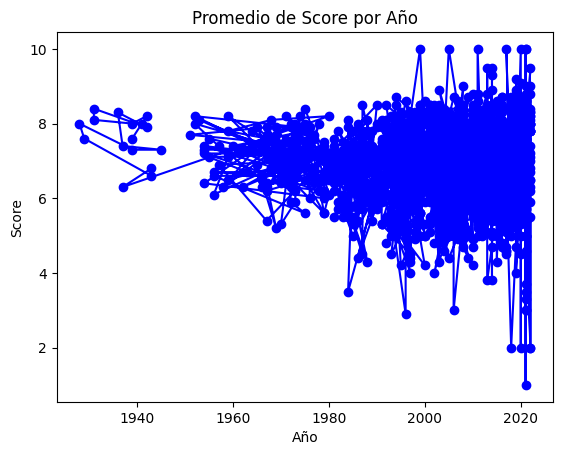

In [ ]:
plt.plot(df['release_year'], df['tmdb_score'], marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Score')
plt.title('Promedio de Score por Año')

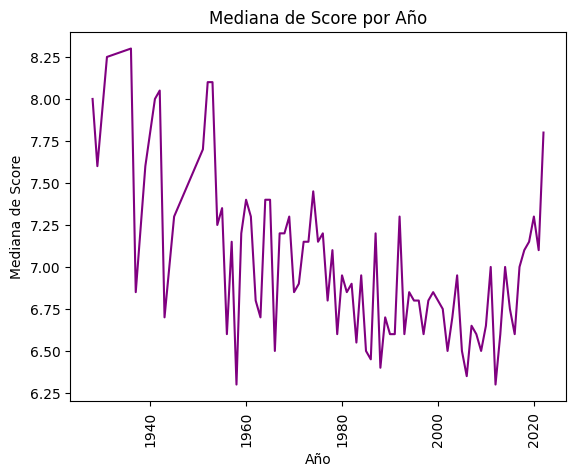

In [ ]:
prom_año = df.groupby('release_year')['tmdb_score'].median()
prom_año.plot(kind='line', color='purple', linestyle='-')
plt.xlabel('Año')
plt.xticks(rotation=90 )
plt.ylabel('Mediana de Score')
plt.title('Mediana de Score por Año')

plt.show()

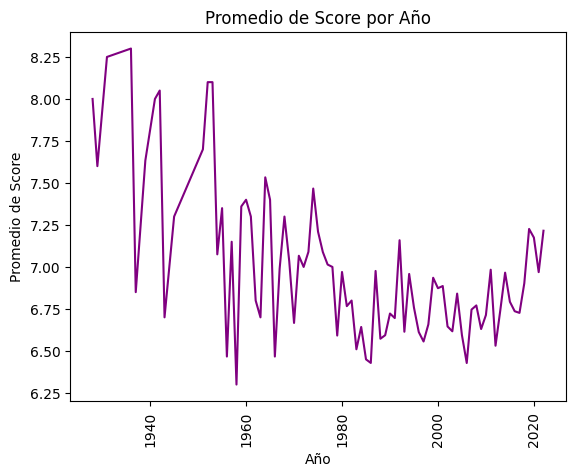

In [ ]:
prom_año = df.groupby('release_year')['tmdb_score'].mean()
prom_año.plot(kind='line', color='purple', linestyle='-')
plt.xlabel('Año')
plt.xticks(rotation=90 )
plt.ylabel('Promedio de Score')
plt.title('Promedio de Score por Año')

plt.show()

In [ ]:
df_counts = df.groupby(['release_year', 'type']).size().unstack()#conntar la cantidad de peliculas y series


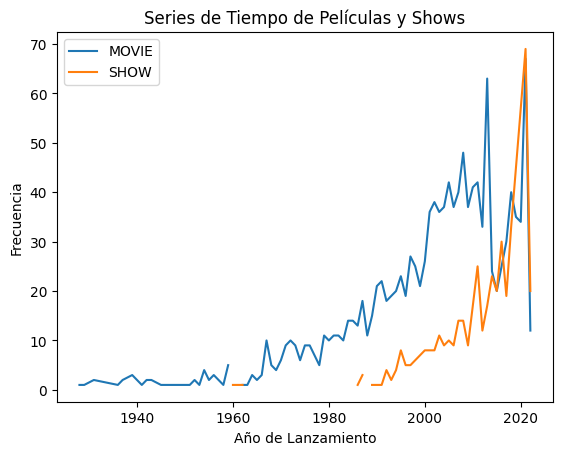

In [ ]:
# Grafica de serie y pelicula en la misma grafica
plt.plot(df_counts.index, df_counts['MOVIE'], label='MOVIE')
plt.plot(df_counts.index, df_counts['SHOW'], label='SHOW')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Series de Tiempo de Películas y Shows')
plt.legend()

In [ ]:
fig = px.histogram(df_2, x = 'imdbvotes', nbins = 30, title = 'Distribucion de votos tmdb')
fig.update_layout(xaxis_title = 'Votos de  de Series y Peliculas', yaxis_title = 'Frecuencia', template = 'plotly_white', bargap = 0.2)
fig.show()

In [ ]:
df_2.describe()

,runtime,imdb_score,imdb_votes,tmdb_popularity,imdbvotes,tmdb_scores
count,1877.000,1877.000,1877.000,1877.000,1877.000,1877.000
mean,86.388,6.806,95472.836,31.619,95472.836,6.841
std,38.627,1.119,211193.139,114.732,211193.139,1.017
min,4.000,1.500,5.000,0.050,5.000,1.000
25%,57.000,6.100,5237.000,7.881,5237.000,6.200
50%,96.000,6.900,22647.000,13.584,22647.000,6.900
75%,112.000,7.600,87665.000,27.354,87665.000,7.600
max,242.000,9.400,2555504.000,4447.894,2555504.000,10.000


In [ ]:
fig = px.histogram(df_2, x = 'tmdb_popularity', nbins = 30, title = 'Distribución tmdb popularidad')
fig.update_layout(xaxis_title = 'La popularidad', yaxis_title = 'Frecuencia', template = 'plotly_white', bargap = 0.2)
fig.show()

In [ ]:
popularidad=df_2[df_2['tmdb_popularity'] > 500]#mas populares en base a la presentacion anterior
popularidad.shape

(5, 6)

Text(0.5, 1.0, 'Score de lo mas popular')

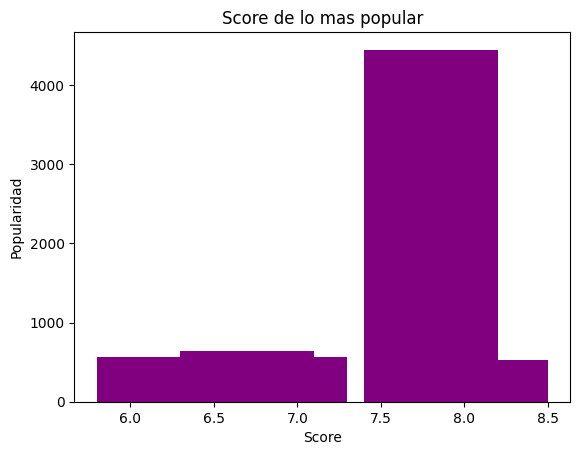

In [ ]:
plt.bar( popularidad['tmdb_scores'],popularidad['tmdb_popularity'],color='purple')
plt.xlabel('Score')
plt.ylabel('Popularidad')
plt.title('Score de lo mas popular')

In [ ]:
scoremax=df_2[(df_2['tmdb_scores'] > 8) & (df_2['tmdb_scores'] < 9)]#mas score en base a la presentacion anterior
scoremax.shape

(173, 6)

In [ ]:
scoremax.head()

,runtime,imdb_score,imdb_votes,tmdb_popularity,imdbvotes,tmdb_scores
id,,,,,,
tm77588,102,8.500,558849.000,20.087,558849.000,8.200
tm47834,117,8.300,155068.000,9.165,155068.000,8.100
tm52402,87,8.500,181367.000,13.647,181367.000,8.400
tm118404,87,8.500,236933.000,14.155,236933.000,8.300
tm97341,144,8.400,984610.000,62.669,984610.000,8.200


Text(0.5, 1.0, 'Popularidad de las peliculas con mejor calificación')

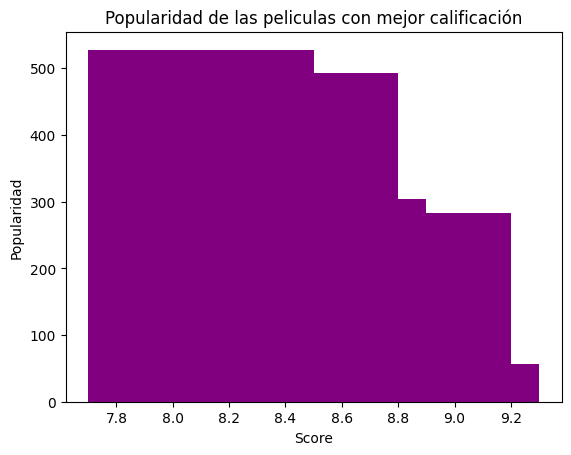

In [ ]:
plt.bar(scoremax['tmdb_scores'],scoremax['tmdb_popularity'],color='purple')
plt.xlabel('Score')
plt.ylabel('Popularidad')
plt.title('Popularidad de las peliculas con mejor calificación')

In [ ]:
corr_matrix = df_2.corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu',  range_color=[-1,1], text_auto = True, aspect = "auto")
fig.update_layout(title='Correlation Heatmap')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
fig = px.scatter_matrix(df_2, dimensions=df_2.columns[:-1], title='Pairwise Scatter Plot', height = 1000, color = 'tmdb_scores')
fig.update_traces(diagonal_visible=False)
fig.show()


MODELO REGRESION

In [ ]:
X = df_2.drop('tmdb_scores', axis=1)
y = df_2['tmdb_scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

svm = SVR()
svm.fit(X_train_scaled, y_train)


SVR()

In [ ]:
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm:.2f}")

SVM MSE: 0.46


In [ ]:
svm_r2 = r2_score(y_test, y_pred_svm)
print(f"SVM R^2 Score: {svm_r2:.2f}")

SVM R^2 Score: 0.53


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}


In [ ]:
svm = SVR()
grid_search_svm = GridSearchCV(estimator = svm, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
best_params_svm = grid_search_svm.best_params_
best_params_svm


{'C': 1, 'kernel': 'rbf'}

In [ ]:
best_model_svm = grid_search_svm.best_estimator_
best_model_svm

SVR(C=1)

In [ ]:
y_pred_best_svm = best_model_svm.predict(X_test_scaled)
mse_best_svm = mean_squared_error(y_test, y_pred_best_svm)
print(f"SVM MSE: {mse_best_svm:.2f}")

SVM MSE: 0.46


ARBOL DE DESICION


id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
imdbvotes               0
dtype: int64

In [ ]:
df_2.head()

,runtime,imdb_score,imdb_votes,tmdb_popularity,imdbvotes,tmdb_scores
id,,,,,,
tm155702,102,8.1,389774.0,41.442,389774.0,7.6
tm83648,119,8.3,433804.0,14.383,433804.0,8.0
tm77588,102,8.5,558849.0,20.087,558849.0,8.2
tm156463,233,8.2,309856.0,24.092,309856.0,8.0
tm47834,117,8.3,155068.0,9.165,155068.0,8.1


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

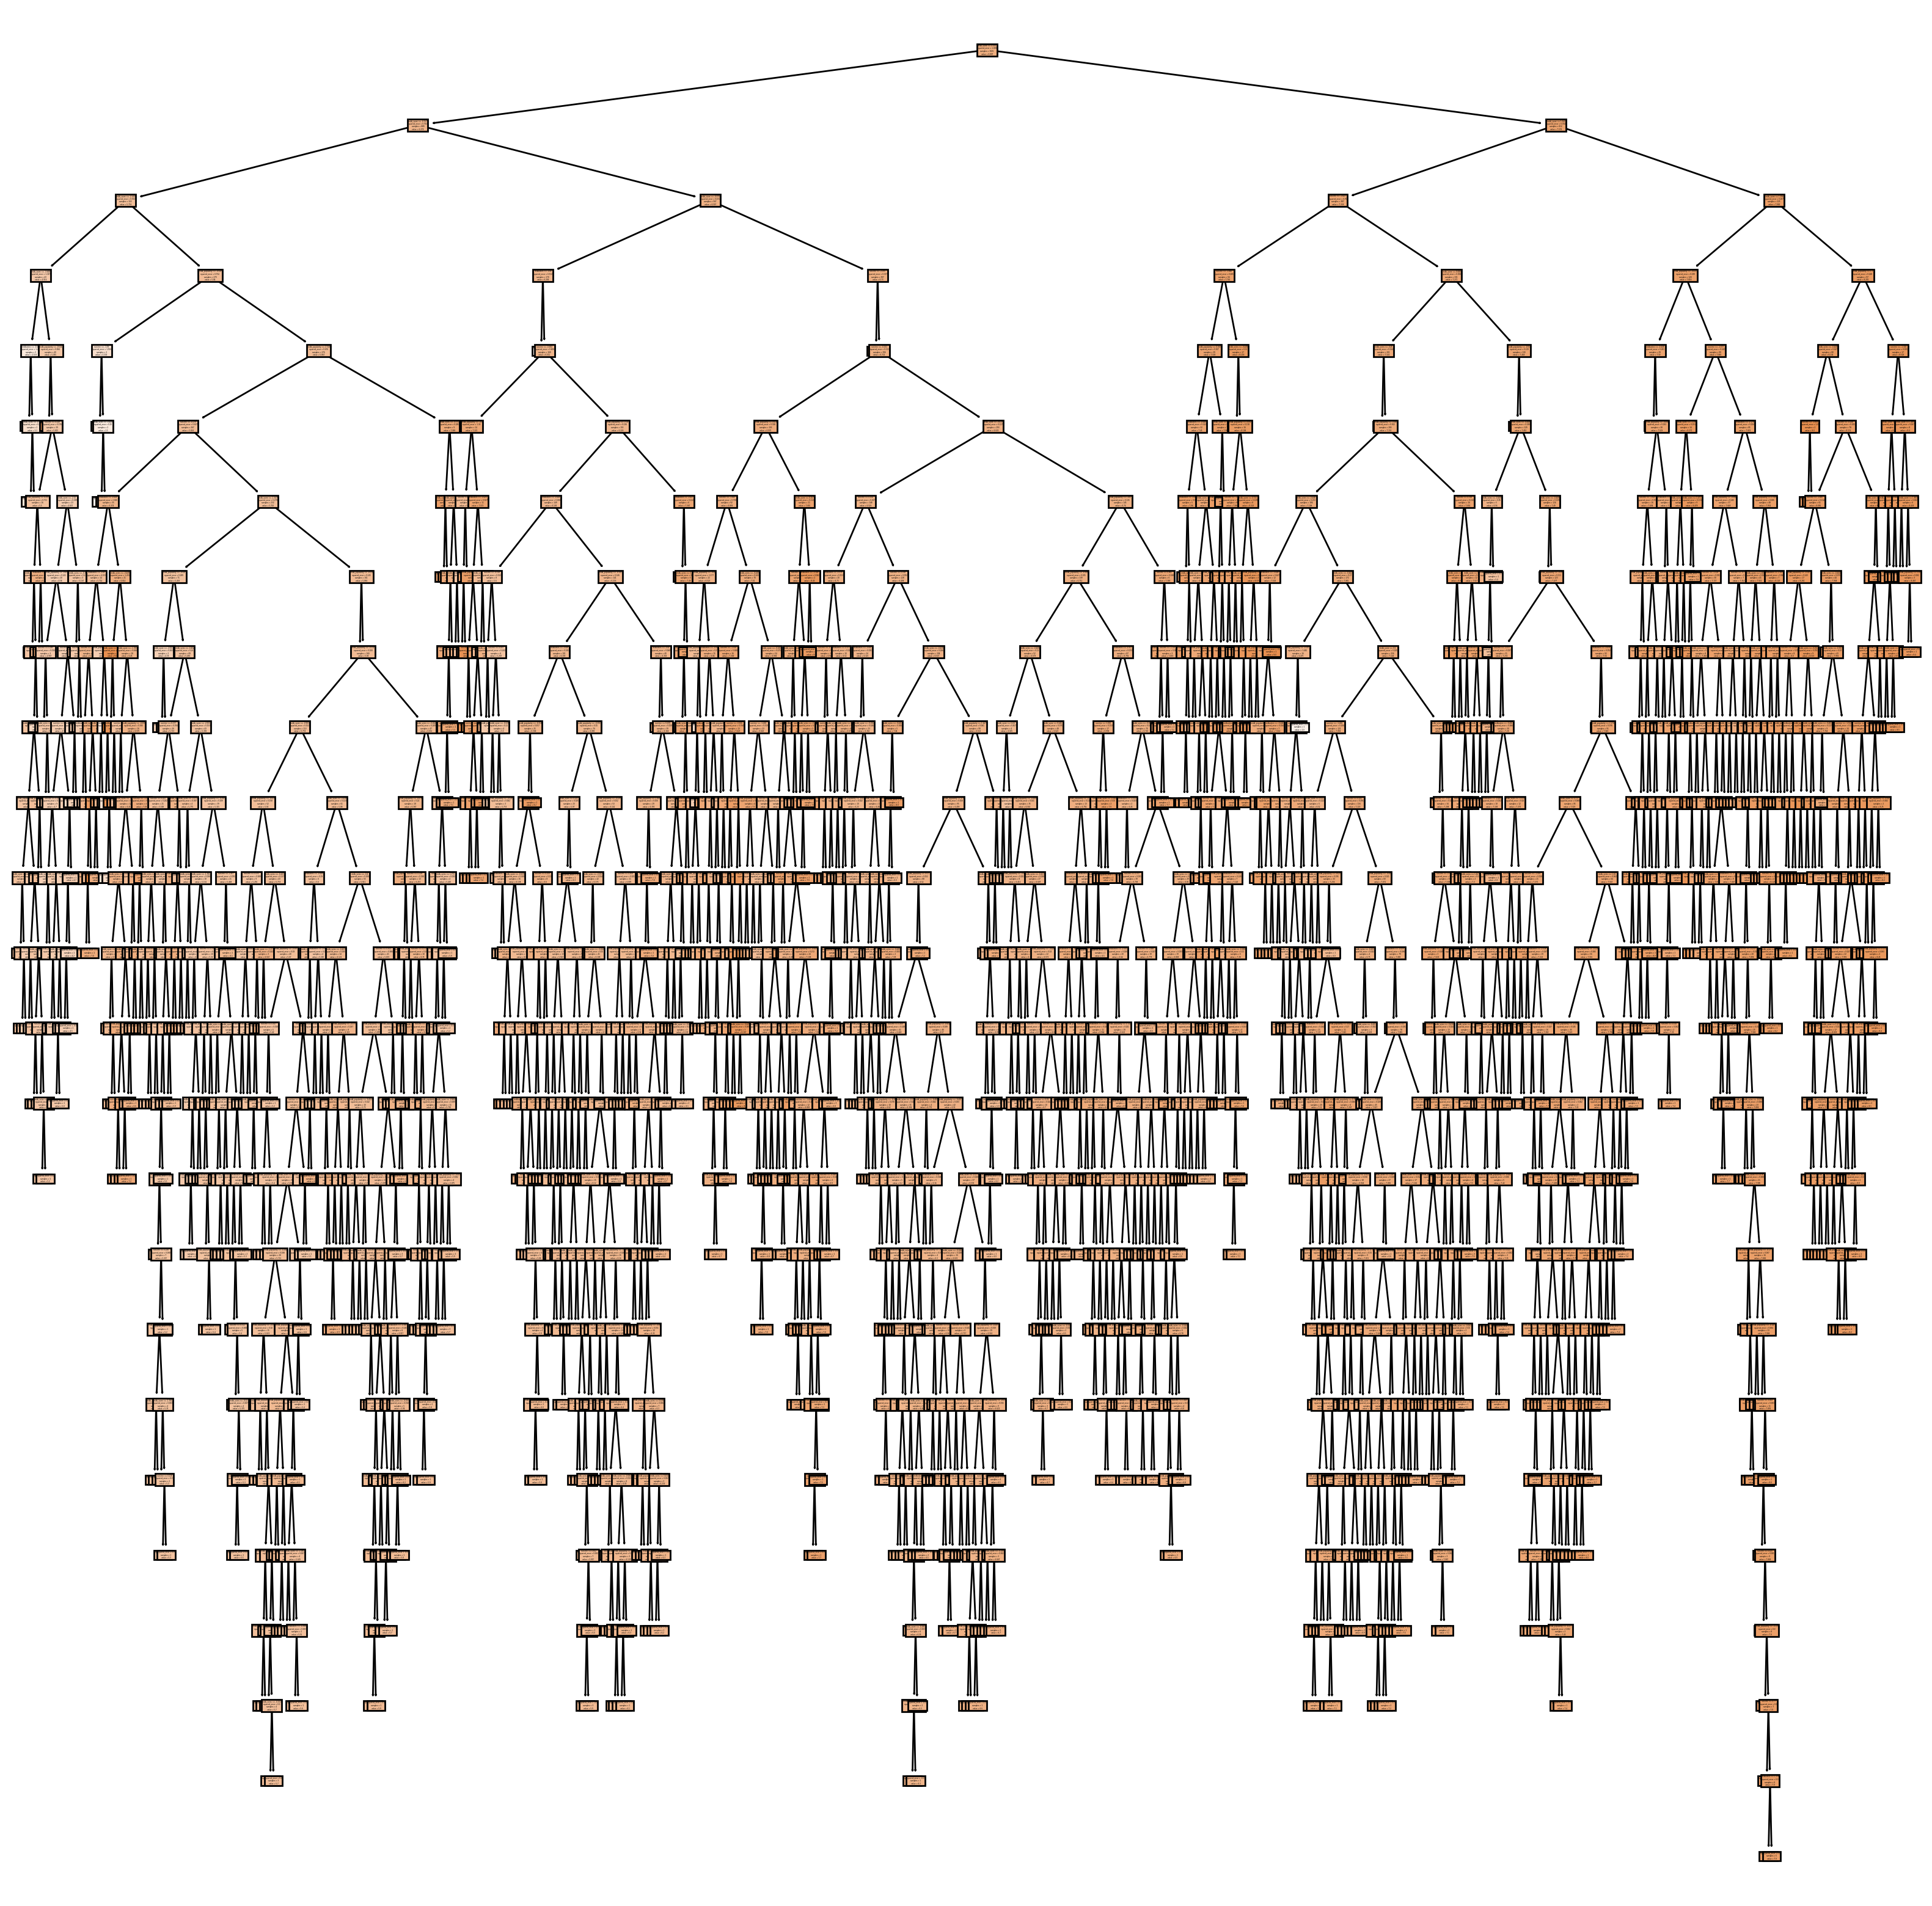

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)
plot_tree(dt, feature_names = df_2.columns[:-1], filled=True)
plt.show()

In [ ]:
y_pred_dt = dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Trees MSE: {mse_dt:.2f}")


Decision Trees MSE: 0.89


In [ ]:
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"DT R^2 Score: {dt_r2:.2f}")

DT R^2 Score: 0.10


In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']}


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_params_dt = grid_search_dt.best_params_
best_params_dt

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=42)

In [ ]:
y_pred_best_dt = best_model_dt.predict(X_test_scaled)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
print(f"DT MSE: {mse_best_dt:.2f}")

DT MSE: 0.53


Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")

Random Forest MSE: 0.50


In [ ]:
rf_r2 = r2_score(y_test, y_pred_dt)
print(f"RF R^2 Score: {rf_r2:.2f}")

RF R^2 Score: 0.10


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']}

In [ ]:
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
best_model_rf = grid_search_rf.best_estimator_
best_model_rf

In [ ]:
y_pred_best_rf = best_model_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"RF MSE: {mse_best_rf:.2f}")

In [ ]:
X = df_1.drop('tmdb_scores', axis=1)

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[167352827310801.44,
 65345593169116.94,
 29964349178524.594,
 17204563003554.035,
 10631299431368.219,
 7523788002674.08,
 5509542262815.095,
 3976679294254.2627,
 2864889691770.823,
 2393441708943.613]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', name='WCSS'))
fig.update_layout(title='Elbow Method for Optimal K',
                  xaxis_title='Number of Clusters (K)',
                  yaxis_title='WCSS',
                  xaxis=dict(tickmode='linear', tickvals=list(range(1, 11))),
                  yaxis=dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
silhouette_scores

[0.856428522015481,
 0.8092639247618518,
 0.7676435935963104,
 0.7383775124979474,
 0.7014767988612003,
 0.7098424852962122,
 0.673063858247455,
 0.6713783836507966,
 0.6577210748173323]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = list(range(2, 11)), y = silhouette_scores, mode = 'lines+markers', name = 'Silhouette Score'))
fig.update_layout(title = 'Silhouette Score for Optimal K',
                  xaxis_title = 'Number of Clusters (K)',
                  yaxis_title = 'Silhouette Score',
                  xaxis = dict(tickmode='linear', tickvals=list(range(2, 11))),
                  yaxis = dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df_1_c3 = df_1.copy()
df_1_c3['cluster'] = kmeans .labels_
df_1_c3['cluster'] = df_1_c3.cluster.astype(str)
fig = px.scatter(df_1_c3, x = 'imdb_score', y = 'tmdb_popularity', color = 'cluster', template = 'plotly_white', title = 'Cluster - 3')
fig.show()